In [10]:
import csv
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

No:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 22

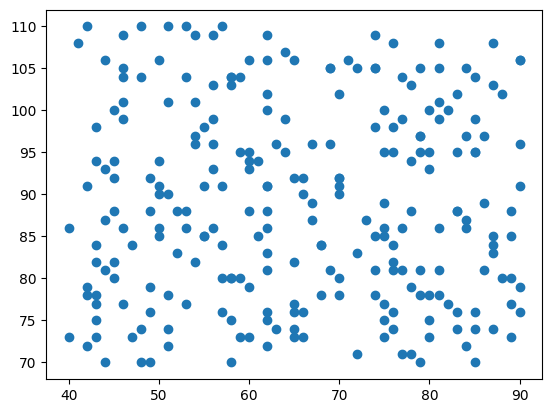

In [14]:
def baca_tabel_per_kolom(file_path):
    kolom = {}
    with open(file_path, "r", newline="", encoding="utf-8") as f:
        reader = csv.DictReader(f)
        
        for h in reader.fieldnames:
            kolom [h] = []
        
        for row in reader:
            for h in reader.fieldnames:
                value = row[h]
                if value.isdigit():
                    kolom[h].append(int(value))
                else:
                    kolom[h].append(value)
                
    return kolom

# Main 
file_txt = "./dataset.csv"
hasil = baca_tabel_per_kolom(file_txt)

# Akses Setiap Kolom
print("No: ", hasil["No"])
print("Nama: ", hasil["Nama"])
print("Berat Badan: ", hasil["BeratBadan"])
print("Tinggi Badan: ", hasil["TinggiBadan"])
print("Lingkar Pinggang: ", hasil["LingkarPinggang"])
print("Tekanan: ", hasil["TekananDarah"])

x = hasil["BeratBadan"]
y = hasil["LingkarPinggang"]

plt.scatter(x, y)
plt.show()

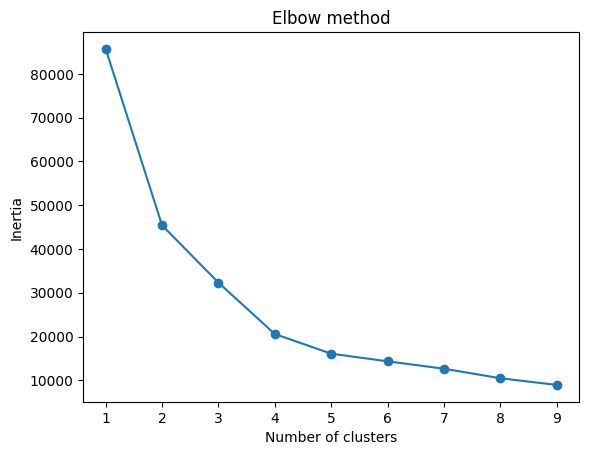

In [15]:
data = list(zip(x, y))
inertias = []

for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,10), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

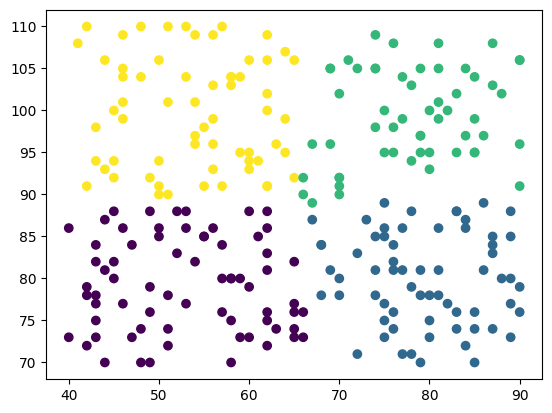

In [16]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show()